# <font color='#31394d'>Random Forests</font>

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# helps us render the figure in a notebook

### <font color='#31394d'>Load data</font>

For this example we will the California Housing Dataset.

In [2]:
# import the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
# initialize the dataframe
data = pd.DataFrame(housing.data)

In [6]:
# see head of the dataset
data.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# add the feature names to the dataframe
data.columns = housing.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
# add target variable to dataframe
data['PRICE'] = housing.target 
# Median value of owner-occupied homes in $1000s

In [9]:
# check the shape of dataframe
data.shape

(20640, 9)

In [10]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [11]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [12]:
# identify the unique number of values in the dataset
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [13]:
# check for missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [14]:
# see rows with missing values
data[data.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE


In [15]:
# finding out the correlation between the features
corr = data.corr()
corr.shape

(9, 9)

In [16]:
# check the feature correlations 
# we will use the absolute values of the correlations to get a heatmap of feature importances from lowest (in yellow) to highest (blue)
from itertools import cycle
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

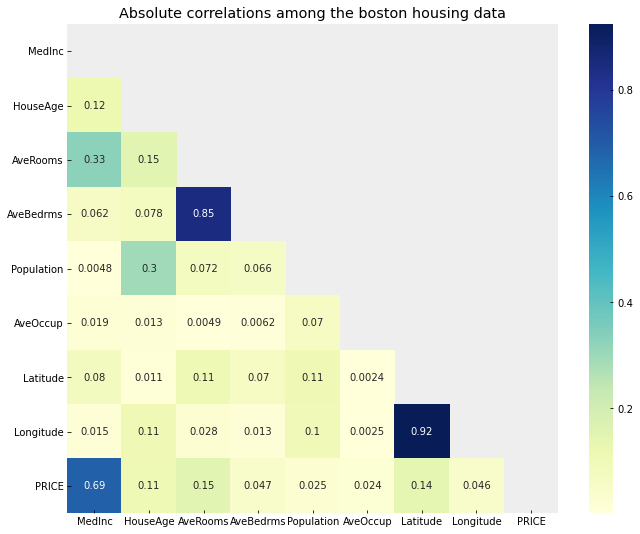

In [17]:
corr = data.corr().apply(lambda x : np.abs(x))
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap="YlGnBu",annot=True).set_title('Absolute correlations among the boston housing data');

In [18]:
# split target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [19]:
# split to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

We will first train a linear regression model to get a good baseline of what performance should be.

## 1. Linear regression

### Training the model 

In [20]:
# import library for Linear Regression
from sklearn.linear_model import LinearRegression

# create a Linear regressor
lm = LinearRegression()

# train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
# what does the above line define? copy_X=True, fit_intercept=True, n_jobs=None.
# copy_X=True: If True, X will be copied; else, it may be overwritten.
# fit_intercept=True: whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be already centered).
# n_jobs=None: The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems.

LinearRegression()

In [22]:
# value of y intercept
lm.intercept_

-36.92588429884598

In [23]:
# convert the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,MedInc,0.438284
1,HouseAge,0.009021
2,AveRooms,-0.113436
3,AveBedrms,0.648835
4,Population,-0.000008
5,AveOccup,-0.003978
6,Latitude,-0.421168
7,Longitude,-0.43468


### Model Evaluation 

In [24]:
# model prediction on train data
y_pred = lm.predict(X_train)

In [25]:
# model Evaluation
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.531907662040379
MSE: 0.525845491043439
RMSE: 0.7251520468449627


MAE: It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

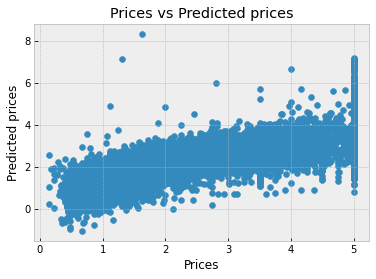

In [26]:
# visualize the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### For test data

In [27]:
# predict test data with the model
y_test_pred = lm.predict(X_test)

In [28]:
# model evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 0.530387277894568
MSE: 0.521346882137459
RMSE: 0.7220435458734182


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

## 2. Random Forest Regressor

### Train the model: X_train

In [29]:
# import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# create a Random Forest Regressor
reg = RandomForestRegressor()

# train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the fore

sklearn's RandomForest implementation trains each base tree with a dataset the same size as the training dataset (sampling with replacement if `bootstrap=True`).

In [31]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(n_estimators=10)

In [ ]:
# if we make n_estimators higher than 100 it would take looonger to run. 
# try a few options and see the performance of the model e.g. randomforest_10 versus randomforest_100

### Model Evaluation

In [32]:
# model prediction on train data
y_pred = reg.predict(X_train)

In [33]:
# model evaluation
acc_rf_train = metrics.r2_score(y_train, y_pred)
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.12263896597452971
MSE: 0.035844372262985986
RMSE: 0.1893261003216038


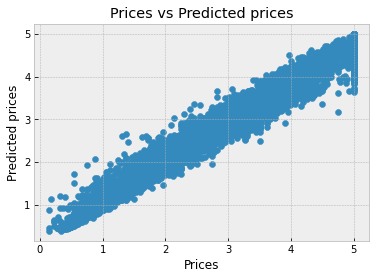

In [34]:
# visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### For test data: : X_test

In [35]:
# predict test data with the model
y_test_pred = reg.predict(X_test)

In [36]:
# model evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 0.332779137403101
MSE: 0.2585639659762368
RMSE: 0.5084918543853351


# Evaluation and comparision of all the models

In [37]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Random Forest Train'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_rf_train*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,Random Forest Train,97.329219
1,Random Forest,80.212888
0,Linear Regression,60.102913
